# Project Details
This project simulates the ferromagnetic to paramagnetic phase transition with temperature using the 2D Ising Model.

**April, 5, 2022**

**Henry Ding**

## Reflection and Revision Process
Originally, this documentation contained a theory section with complex math equations that were difficult to understand. This section was simplified with qualitative conceptual explanations and diagrams so that it was easier to understand.

The concept of ferromagnetism and paramagnetism was also hard to visualize, so I added a video showing these magnets in real life. This made the abstract physics concepts concrete and easy to understand.

My simulation also originally only took a few seconds to run, so I significantly increased the simulation size to simulate many more data points for a more descriptive result graph. This only took a few hours to run, which was manageable.

## Resources
### Research
- Chapter 35, *Physics*, 5th Edition by Resnick, Halliday, and Krane
    - I used this to learn the theory behind ferromagnetism and paramagnetism.


- "Paramagnetism and Diamagnetism" video from UCLA Physics: https://www.youtube.com/watch?v=u36QpPvEh2c&t=23s
    - I used this video to see paramagnetism and ferromagnetic materials in real life and demonstrate both types of materials.
    
    
- "The Ising model" by Richard Fitzpatrick at the University of Texas: https://farside.ph.utexas.edu/teaching/329/lectures/node110.html
    - I used this to learn about the Ising model, including methods for calculating the Hamiltonian and Boltzmann probability.
    
    
- "From Scratch: Bayesian Inference, Markov Chain Monte Carlo and Metropolis Hastings, in python" by Joseph Moukarzel: https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a
    - I used this article for guides on the Metropolis-Hastings algorithm to speed up the Monte Carlo simulation.
    
- "Onsager and Kaufman’s calculation of the spontaneous magnetization of the Ising model" https://arxiv.org/pdf/1103.3347.pdf
    - This paper was used to corroborate the results of my simulation.
    
- The diagrams were hand-drawn.

### Programming
- https://stackoverflow.com/questions/51178699/trying-to-display-youtube-video-in-jupyter-notebook
    - I used this code snippet to embed a YouTube video into a Jupyter Notebook
- https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html
    - I used this documentation for NumPy arrays to find out about NumPy array operations used throughout the program.
- https://jakevdp.github.io/PythonDataScienceHandbook/
    - I used this free online textbook to learn about Jupyter Notebooks and basic NumPy operations.

# DOCUMENTATION


# Theory of the Ising Model
## Ferromagnetism and Paramagnetism
When you hear about magnets, refrigerator magnets probably pop into your head first. However, there are other types of magnetism:

In [16]:
from IPython.display import IFrame

IFrame(src='https://www.youtube.com/embed/u36QpPvEh2c?start=23&end=51', width=854, height=480)


To summarize, **ferromagnetic** materials are permanent magnets that remain magnetized even after an external magnet is removed, while **paramagnetic** materials are temporary magnets.

*Here's where it gets interesting.* When scientists heated up ferromagnetic materials, they found that the strength of a magnet gradually decreased with temperature. Ferromagnets became paramagnets above a certain temperature, known as the **Curie Temperature** (where the graph below touches zero). Here's a plot of **magnetization**, or magnet strength, with temperature for Nickel:


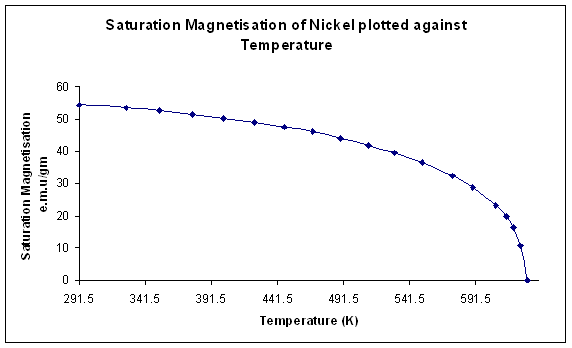

This effect can cause problems for scientists. For example, scientists working on a space probe operating in high temperatures near the Sun will need to determine this curve to ensure the probe's magnets to remain operational. However, testing each individual magnetic material requires expensive lab equipment and experience in experimental physics. Here's the question we will investigate with a simulation:

## The Question
> **What is the magnetization of a magnet at any temperature?**

Enter: the Ising Model.

## The Ising Model

In 1925, **Ernst Ising** discovered a model for modeling ferromagnetic and paramagnetic materials. Earlier developments in quantum mechanics showed that electrons set up a magnetic field, which is aligned with the **spin of an electron.** For the purposes of our model, the electron spin can be either `+1` or `-1`:

<div>
<img src="images/electron_spins.png" width="504"/>
</div>

Every magnetic material has a large number of electrons. Ising theorized that in ferromagnetic materials, the spins of all these electrons stay aligned. This means the magnetic fields of all the electrons add together to make one large magnetic field, magnetizing the material.

<div>
<img src="images/ferromagnetic.png" width="503"/>
</div>

In paramagnetic materials, the spins misalign after an external magnetic field is removed. The spins and magnetic fields from each electron begin canceling out, pointing in opposite directions. The total cumulative magnetic field is zero or really close to zero, meaning that the material loses its magnetism.

<div>
<img src="images/paramagnetic.png" width="502"/>
</div>

What is happening here between individual electrons? Well, since metals are made out of regular, repeating patterns of atoms, we can model all of a material's electrons by putting them in a repeating grid, which physicists call a **lattice.**

<div>
<img src="images/ising_model_lattice.png" width="501"/>
</div>

Each box in the lattice shows the spin of that electron.

Electrons with a spin that is the same as all of its adjacent neighboring electrons, like the electron highlighted in yellow, are low in energy and stable. Electrons with a spin different from all of their neighbor electrons, like the electron highlighted in green, are energetic and unstable. This makes sense, since aligning the spins is like taking two bar magnets and putting the North end with the South end, while misaligned spins place two North or two South ends together. Two North ends magnets repel each other and increase the energy of the configuration.

<div>
<img src="images/magnet_analogy.png" width="250"/>
</div>

**All electrons want to have the lowest energy.** Otherwise, repulsion from misaligned neighbors would force electron spins to change, lowering their energy. Why then, do the spins of the paramagnetic materials misalign over time?

Well, physicists know that all materials with temperature have random thermal energy from the vibration of electrons and atoms. The Ising Model predicts that this random thermal energy has a chance to occasionally gives an electron energy to flip the sign of their spin into a misaligned position. When an electron changes its spin, this is known as a **spin-flip.**

<div>
<img src="images/thermal_energy.png" width="499"/>
</div>

We can use a concept known as the *Boltzmann distribution* to find the probability of a **spin-flip** occurring in our simulation.

Do multiple spin flips occur at the same time? Well, it turns out that the thermal energy of a system is usually very low compared to the change in energy it takes for a spin-flip. So, it is very unlikely for enough random thermal energy to be concentrated at any moment for multiple spin-flips. This is great since we can use an approximation known as **single-spin flip dynamics**, need to only flip a single spin at a time in our simulation.

## The Simulation
Now, we finally have all theoretical physics in place to write our computer simulation of the Ising Model. Here are some key features of our model:
1. A data structure store the electron spins of all electrons in our lattice. We’ll use a 2D NumPy array for a 10 $\times$ 10 lattice.


2. A method to select a random electron spin to flip. Every electron in our lattice is equally likely to receive thermal energy for a spin flip.


3. A function that calculates the probability of an electron-spin flip occurring, using the Boltzmann distribution.
    - If this probability is greater than one (which happens if the spin-flip happens to bring the electron to lower energy), then the electron will always flip. 
    - If this probability is less than one, there's a chance of the spin-flip.
    
    
4. A method to calculate the magnetization (the magnetic strength) of the material. 
    - We can find the mean spin of the electrons: if the electron spins are aligned, then the mean is not equal to zero and the material is magnetic; otherwise, the average is zero and the material is nonmagnetic.
    
    
5. Repeated trials to measure magnetization at different temperatures.

## Why Monte Carlo?
For the Ising Model, we need a Monte Carlo simulation. For just a 10 $\times$ 10 lattice, there are 100 different electrons that flip at every step. Over millions of steps, there are an unfathomable number of distinct configurations, so we'll need a random Monte Carlo simulation to find the most likely outcome, which is the most likely magnetization in our simulation at a certain temperature.

Let's get programming!

# Implementation

`numpy` is used for mathematical operations, while `matplotlib` is used to graph the results.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This method finds the positions of nearest neighbors of a electron at position ``pos`` in a lattice.

In [3]:
def find_nn(lattice, pos):
    '''
    Finds the adjacent neighbors of a lattice position in a simple cubic lattice.
    '''
    # tiles position into an array of 4 position arrays, and adds relative positions of neighbors
    positions = np.tile(pos, (4, 1)) + np.array([[-1, 0], [0, -1], [1, 0], [0, 1]]);
    
    return positions

Here's the Monte Carlo function to simulate the evolution of our electron lattice for random spin flips over time

In [4]:
def mc_ising(lattice_i, interaction_coefficient, temperature, n_steps, burn_steps):
    '''
    This function uses a Monte Carlo simulation to track the evolution of an Ising Model over time.
    
    Arguments:
    - lattice_i: the initial electron lattice, requires a numpy.ndarray
    - interaction_coefficient: the ratio J/k used to scale the strength of interactions between different spins
    - temperature: the temperature of the lattice
    - n_steps: the number of Monte Carlo steps to run on the simulation
    - burn_steps: number of initial Monte Carlo steps to ignore, to give time for the material to adjust to the temperature
    
    Returns:
    - A history of the lattice over all Monte Carlo steps
    '''
    # check that input lattice is two-dimensional
    assert lattice_i.ndim == 2, 'Lattice must be two-dimensional, but has dimension {0}'.format(lattice_i.ndim)
    lattice = lattice_i.copy()
    width, height = lattice.shape
    lattice_history = [lattice]
    
    for step in range(n_steps):
        # randomly choose a position in the lattice to spin-flip within the boundaries of the lattice
        pos_flip = np.array([np.random.randint(width), np.random.randint(height)])
        
        neighbors = find_nn(lattice, pos_flip)
        # sum of neighbor spins
        spin_sum = 0
        for n in neighbors:
            spin_sum += lattice[n[0] % width, n[1] % height]
        
        # natural log of flip probability
        ln_p = -2 * interaction_coefficient / temperature * lattice[pos_flip[0], pos_flip[1]] * spin_sum
        
        # determine whether to flip based on probability - if greater than ln(1), always flip, other wise flip based on random chance
        if ln_p > 0 or ln_p > np.log(np.random.random()):
            # flip spin
            lattice[pos_flip[0], pos_flip[1]] *= -1
            if step >= burn_steps :
                lattice_history.append(lattice.copy())
                
    return np.array(lattice_history)  

Now let's simulate the evolution of our electron lattice overtime at different temperature values. We'll start with a lattice of entirely aligned electron spins of $+1$.

In [38]:
# declares lattice array and sets spins for initial lattice
INIT_LATTICE = np.ones((10, 10))

temperature_values = np.arange(1.5, 3, 0.01)
# the magnetization, the strength of our magnet
M_values = []

# testing different temperature values
for t in temperature_values:
    print("Testing temperature {0}".format(t))
    # 1,000,000 Monte Carlo trials are run, with the first 100,000 steps burned
    # A kJ product of 1 is used
    lattice_history = mc_ising(INIT_LATTICE, 1, t, 1000000, 100000)
    # adds average magnetization
    M_values.append(abs(np.mean(lattice_history)))

Testing temperature 1.5
Testing temperature 1.51
Testing temperature 1.52
Testing temperature 1.53
Testing temperature 1.54
Testing temperature 1.55
Testing temperature 1.56
Testing temperature 1.57
Testing temperature 1.58
Testing temperature 1.59
Testing temperature 1.6
Testing temperature 1.61
Testing temperature 1.62
Testing temperature 1.6300000000000001
Testing temperature 1.6400000000000001
Testing temperature 1.6500000000000001
Testing temperature 1.6600000000000001
Testing temperature 1.6700000000000002
Testing temperature 1.6800000000000002
Testing temperature 1.6900000000000002
Testing temperature 1.7000000000000002
Testing temperature 1.7100000000000002
Testing temperature 1.7200000000000002
Testing temperature 1.7300000000000002
Testing temperature 1.7400000000000002
Testing temperature 1.7500000000000002
Testing temperature 1.7600000000000002
Testing temperature 1.7700000000000002
Testing temperature 1.7800000000000002
Testing temperature 1.7900000000000003
Testing temper

Let's plot our results with net magnetization v.s. temperature.

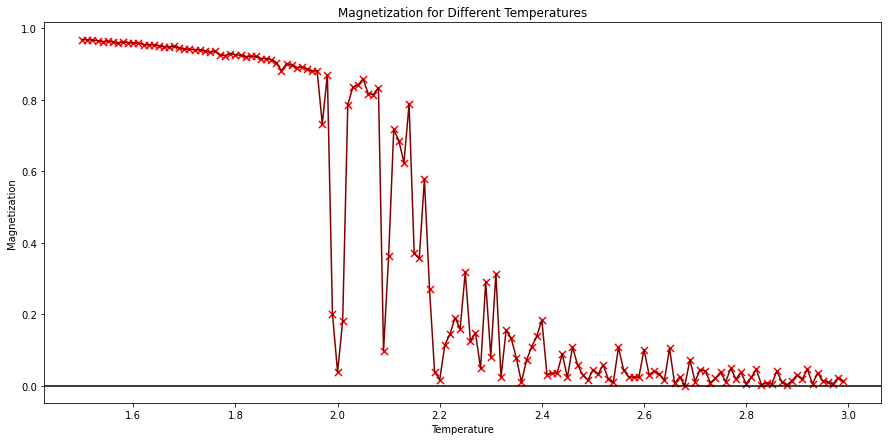

In [43]:
# create one plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

# graph magnetization v.s. temperature - line and points
ax.plot(temperature_values, [abs(x) for x in M_values], color='maroon')
ax.scatter(temperature_values, [abs(x) for x in M_values], marker='x', color='red', s=50)

# labels
ax.set_title("Magnetization for Different Temperatures")
ax.set_xlabel("Temperature")
ax.set_ylabel("Absolute Magnetization")
ax.axhline(y=0, color='black', linestyle='-')

plt.show()

# Result Analysis

Besides certain outlier temperature values, the graph mostly matches the curve for Nickel Magnetization v.s. Temperature graph at the start of this document. The magnetization slowly decreases with temperature before rapidly dropping down to zero within just a few temperature increments. 

In order for a material to become significantly demagnetized, the temperature needs to reach a point where the rate of spin misaligning due to thermal energy needs to be higher than the rate of spin aligning from lowering energy. Below this point, there are only occasional blips of misaligned spins throughout the lattice that eventually get aligned at some later time. However, past the point where the rate of misalignment is higher than alignment, any small blips of misaligned spins are able to sustainably grow, quickly dominating the lattice with large regions of misaligned spins. This explains why the magnetization decreases relatively slowly until temperature reaches a certain point and magnetization drops suddenly - the graph had reached that critical temperature where the rates of alignment and misaligned were equal.

<div>
<img src="images/results_analysis.png" width="700"/>
</div>

The Curie Temperature on the graph, where magnetization reaches zero, is roughly around 2.2-2.4. This matches well with the results from research by Lars Onsager in the 1970s! Onsager found the value to be around 2.27.

The presence of outliers of zero magnetization at 2.0 temperature and around 2.1 temperature are likely due to random variations in the simulation. During certain trials, there could have been enough spin flips to create a large region of semi-stable misaligned spins that group together in order to reduce the chance of their spins realigning (since two misaligned spins of $-1$ will not repel). These random large blobs of misalignment might have existed long enough to significantly reduce the average magnetization measured at the end, producing these outliers.

<div>
<img src="images/results_analysis2.png" width="500"/>
</div>